In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from pathlib import Path

In [2]:
paths_to_performance = [
    {
        "window": "lung",
        "foreground_label": 1,
        "label_description": "parenquima",
        "bbox_scale": 1.0,
        "path_to_performance": "resources/performance_lung_window_foreground_label_1_scale_1_0.json"
    },
    {
        "window": "lung",
        "foreground_label": 1,
        "label_description": "parenquima",
        "bbox_scale": 1.25,
        "path_to_performance": "resources/performance_lung_window_foreground_label_1_scale_1_25.json"
    },
    {
        "window": "lung",
        "foreground_label": 1,
        "label_description": "parenquima",
        "bbox_scale": 1.5,
        "path_to_performance": "resources/performance_lung_window_foreground_label_1_scale_1_5.json"
    },
    {
        "window": "lung",
        "foreground_label": 2,
        "label_description": "infection",
        "bbox_scale": 1.0,
        "path_to_performance": "resources/performance_lung_window_foreground_label_2_scale_1_0.json"
    },
    {
        "window": "lung",
        "foreground_label": 2,
        "label_description": "infection",
        "bbox_scale": 1.25,
        "path_to_performance": "resources/performance_lung_window_foreground_label_2_scale_1_25.json"
    },
    {
        "window": "lung",
        "foreground_label": 2,
        "label_description": "infection",
        "bbox_scale": 1.5,
        "path_to_performance": "resources/performance_lung_window_foreground_label_2_scale_1_5.json"
    },
]

In [3]:
performance_df = pd.DataFrame()
for item in paths_to_performance:
    with open(item["path_to_performance"], 'r') as file:
        df = pd.DataFrame(json.load(file)['bboxes'])
    df["normalization"] = item["window"]
    df["foreground_label"] = item["foreground_label"]
    df["label_description"] = item["label_description"]
    df["bbox_scale"] = item["bbox_scale"]
    performance_df = pd.concat([performance_df, df])
performance_df.reset_index(drop=True, inplace=True)

In [4]:
min_annotated_pixels = 25
pixel_size_mm = 0.6422 # mean (each study has a different resolution; median=0.6464)
min_measurable_size_mm = 10
print(f"Minimum size for measurable lesion (along one x-y axis): {int(np.ceil(min_measurable_size_mm / pixel_size_mm))} pixels ")
print(f"Total bounding boxes: {len(performance_df)}")
performance_df = performance_df[performance_df['annotated_pixels'] >= min_annotated_pixels]
print(f"Total bounding boxes with > {min_annotated_pixels} annotated pixels: {len(performance_df)}")

Minimum size for measurable lesion (along one x-y axis): 16 pixels 
Total bounding boxes: 514725
Total bounding boxes with > 25 annotated pixels: 514725


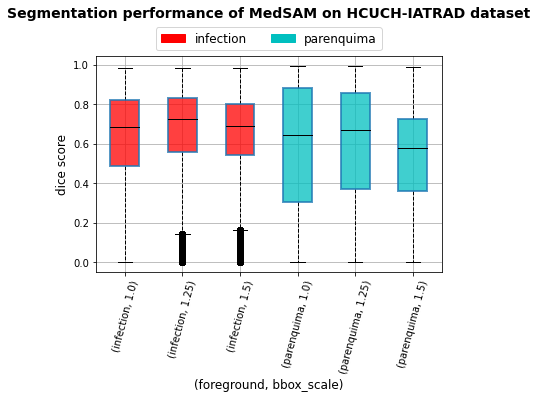

In [5]:
labels_colors = ['r', 'c']
scales_count = len(performance_df['bbox_scale'].unique())
colors = scales_count * [labels_colors[0]] +  scales_count * [labels_colors[1]]
boxplot = performance_df.boxplot(
    column='dice_score',
    by=['label_description', 'bbox_scale'],
    return_type='both',
    patch_artist=True,
    medianprops={'color': 'k', 'linewidth': 1},
    whiskerprops={'linestyle': '--'}
)
for _, (_, row) in boxplot.items():
    for color, box in zip(colors, row['boxes']):
        box.set_facecolor(color)
        box.set_alpha(0.75)
        box.set_linewidth(2)
handles = [mpatches.Patch(color=color) for color in labels_colors]
labels = ['infection', 'parenquima']
plt.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    ncol=len(colors),
    bbox_to_anchor=(0.5, 1.16),
    fontsize=12
)
plt.suptitle('')
plt.title(
    'Segmentation performance of MedSAM on HCUCH-IATRAD dataset',
    x=0.5,
    y=1.15,
    fontweight='bold',
    fontsize=14
)
plt.ylabel('dice score', fontsize=12)
plt.xlabel('(foreground, bbox_scale)', fontsize=12)
plt.xticks(rotation=75)
#plt.savefig('MedSAM_performance_HCUCH_IATRAD.png', bbox_inches='tight')
plt.show()